In [4]:
from konlpy.tag import Okt
okt = Okt()

# 예제 텍스트
text = "이것은 자연어 처리를 위한 한글 텍스트입니다. 텍스트를 분석하고 처리합니다."

# 텍스트 토큰화
tokens = okt.morphs(text)

# 불용어 리스트 정의
stopwords = ['이것', '텍스트', '위한']

# 불용어 제거
tokens_without_stopwords = [word for word in tokens if not word in stopwords]

print("원본 텍스트 토큰:", tokens)
print("불용어 제거 후 토큰:", tokens_without_stopwords)


원본 텍스트 토큰: ['이', '것', '은', '자연어', '처리', '를', '위', '한', '한글', '텍스트', '입니다', '.', '텍스트', '를', '분석', '하고', '처리', '합니다', '.']
불용어 제거 후 토큰: ['이', '것', '은', '자연어', '처리', '를', '위', '한', '한글', '입니다', '.', '를', '분석', '하고', '처리', '합니다', '.']


In [5]:
import MeCab
m = MeCab.Tagger()
m.parse("안녕하세요. 테스트 입니다요.")

'안녕\tNNG,행위,T,안녕,*,*,*,*\n하\tXSV,*,F,하,*,*,*,*\n세요\tEP+EF,*,F,세요,Inflect,EP,EF,시/EP/*+어요/EF/*\n.\tSF,*,*,*,*,*,*,*\n테스트\tNNG,행위,F,테스트,*,*,*,*\n입니다요\tVCP+EF,*,F,입니다요,Inflect,VCP,EF,이/VCP/*+ᄇ니다요/EF/*\n.\tSF,*,*,*,*,*,*,*\nEOS\n'

In [9]:
from konlpy.tag import Mecab 
mecab = Mecab(dicpath="C:/mecab/mecab-ko-dic")
text = """사실 저 USSBaltimore가 저였습니다.. 저때 당시 무료로 풀릴 당시라 유입이 많이 있었는데 꽤 그립네요... 지금은 한국인은 아예 없을뿐더러 다들 라이더스 리퍼블릭으로 넘어가셧지만 스팁만의 배경과 라이더스 리퍼블릭만의 조작감 이슈로 저는 라이더스 리퍼블릭보단 스팁을 아직도 플레이 중입니다 덕분에 저때 당시 52렙이었지만 현재전 100레벨 이상을 넘게 찍어서 한국인중 최후의 썩은물이 되어버렸네요.. 저때 당시 제가 영어만 쓰는 컨셉질을 많이해서 다른 분들에게 다가가 접근해 한국인분들이랑 재밋게 놀고 있었답니다"""
morphs = mecab.morphs(text)
pos = mecab.pos(text)
nouns = mecab.nouns(text)

print('mecab check :', morphs)
print('mecab check :', pos)
print('mecab check :', nouns)

mecab check : ['사실', '저', 'USSBaltimore', '가', '저', '였', '습니다', '.', '.', '저', '때', '당시', '무료', '로', '풀릴', '당시', '라', '유입', '이', '많이', '있', '었', '는데', '꽤', '그립', '네요', '.', '..', '지금', '은', '한국인', '은', '아예', '없', '을', '뿐', '더러', '다', '들', '라이', '더', '스', '리퍼블릭', '으로', '넘어가', '셧', '지만', '스', '팁', '만', '의', '배경', '과', '라이더', '스', '리퍼블릭', '만', '의', '조작', '감', '이슈', '로', '저', '는', '라이더', '스', '리퍼블릭', '보단', '스', '팁', '을', '아직', '도', '플레이', '중', '입니다', '덕분', '에', '저', '때', '당시', '52', '렙', '이', '었', '지만', '현재', '전', '100', '레벨', '이상', '을', '넘', '게', '찍', '어서', '한국인', '중', '최후', '의', '썩', '은', '물', '이', '되', '어', '버렸', '네요', '.', '.', '저', '때', '당시', '제', '가', '영어', '만', '쓰', '는', '컨셉', '질', '을', '많이', '해서', '다른', '분', '들', '에게', '다가가', '접근', '해', '한국인', '분', '들', '이랑', '재', '밋', '게', '놀', '고', '있', '었', '답니다']
mecab check : [('사실', 'MAG'), ('저', 'MM'), ('USSBaltimore', 'SL'), ('가', 'JKS'), ('저', 'NP'), ('였', 'VCP+EP'), ('습니다', 'EF'), ('.', 'SF'), ('.', 'SY'), ('저', 'MM'), ('때', 'NNG'), ('당시'

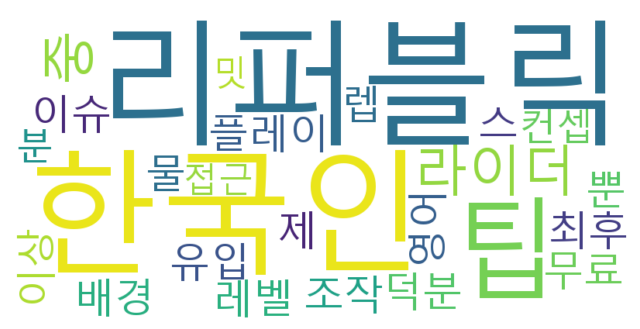

In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# mecab 처리 텍스트
stopwords = ['저', '때', '당시', '지금']

# 불용어 제거
filtered_nouns = [word for word in nouns if word not in stopwords]

# 명사 리스트를 하나의 문자열로 합치기
text = " ".join(filtered_nouns)

# 워드 클라우드 객체 생성
wordcloud = WordCloud(
    font_path='C:/Windows/Fonts/malgun.ttf',  # 한글 폰트 경로
    background_color='white',  # 배경색
    max_words=200,  # 최대 단어 수
    width=800, height=400  # 크기
).generate(text)

# 워드 클라우드 시각화
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # 축 제거
plt.show()

마스크 이미지 변경

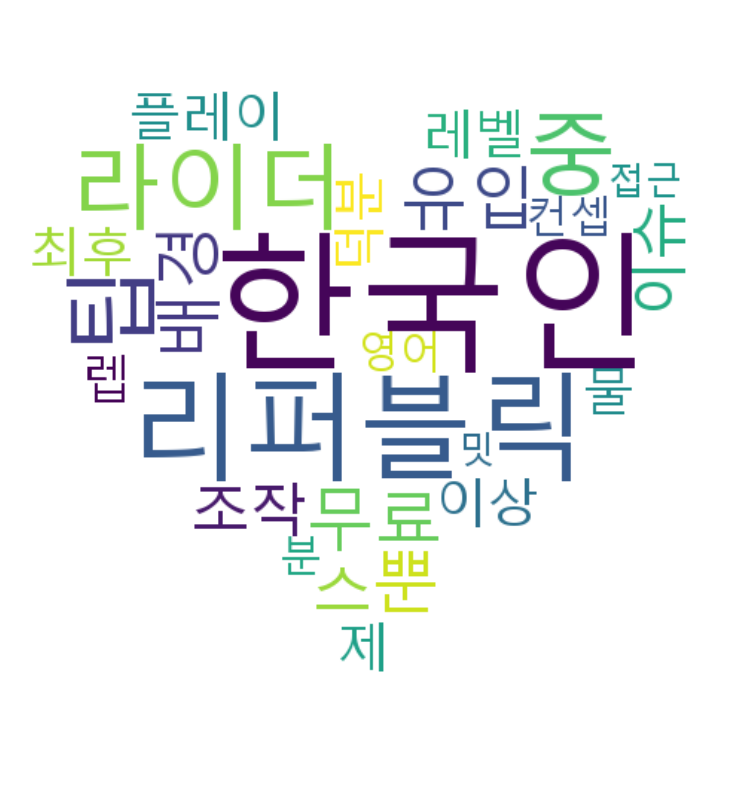

In [11]:
from PIL import Image, ImageOps
import numpy as np

# 이미지 로드
image_path = 'mask1.png'
image = Image.open(image_path)

# 이미지 반전 - 필요할 경우 실행
# image = ImageOps.invert(image) # invert=반전

# 반전된 이미지를 배열로 변환
mask1 = np.array(image)

# 워드 클라우드 객체 생성
wordcloud = WordCloud(
    mask=mask1,
    font_path='C:/Windows/Fonts/malgun.ttf',  # 한글 폰트 경로
    background_color='white',  # 배경색
    max_words=200,  # 최대 단어 수
    width=800, height=400  # 크기
).generate(text)

# 워드 클라우드 시각화
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # 축 제거
plt.show()

컬러 스타일 변경해보기

In [ ]:
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# 이미지로부터 색상 생성
image = np.array(Image.open("mask2.png"))
color_generator = ImageColorGenerator(image)

# 워드 클라우드 객체 생성
wordcloud = WordCloud(
    font_path='C:/Windows/Fonts/malgun.ttf',  # 한글 폰트 경로
    color_func=lambda *args, **kwargs: "darkblue", # 모든 단어를 진한 파란색으로 바꾸기
    background_color='white',
    mask=image,  # 이미지 모양의 마스크 사용
    # color_func=color_generator,  # 이미지 색상에 기반한 색상 사용
).generate(text)

# 워드 클라우드 시각화
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Projects\\Python_basic\\3_웹스크롤\\3_2 셀리니움\\mask2.png'

### 데이터 분석 과정 예시

#### 1. 특수 문자, 필요 없는 문자 제거

In [ ]:
import re ## 특수 문자 등 필요 없는 문자 제거를 위한 라이브러리
review = "정말 재미있는 게임입니다!! 최고👍 별로예요... 기대했던 것만큼 재밌지 않았습니다. 😢"
cleaned_review = re.sub(r'[^가-힣\s]', '', review)
print(cleaned_review)

정말 재미있는 게임입니다 최고 별로예요 기대했던 것만큼 재밌지 않았습니다 


#### 2. 정제 데이터를 분석하기 좋은 데이터 프레임 형태로 변환할 필요

In [ ]:
## 직접 해보세요

### 데이터 프레임 예시

In [ ]:
import pandas as pd
import re

# 예시 데이터 생성
data = {
    'reviews': [
        '정말 재미있는 게임입니다!! 최고👍',
        '별로예요... 기대했던 것만큼 재밌지 않았습니다. 😢',
        '업데이트 후에 더 좋아졌어요! 짱짱👏',
        '서버가 자주 다운되네요. 개선이 필요합니다. 😡',
        '친구들과 함께하면 더욱 재미있어요!',
        '그래픽이 아주 멋집니다. 추천해요!',
        '초반에는 재미있는데, 시간이 지나면 지루해집니다.',
        '커뮤니티가 활성화되어 있어 정보 공유하기 좋아요.'
    ]
}

# 데이터 프레임 생성
df = pd.DataFrame(data)

# 데이터 클리닝: 한글과 공백을 제외한 모든 문자 제거
df['cleaned_reviews'] = df['reviews'].apply(lambda x: re.sub(r'[^가-힣\s]', '', x).lower())

# 결과 확인
print(df[['reviews', 'cleaned_reviews']])

                         reviews             cleaned_reviews
0            정말 재미있는 게임입니다!! 최고👍            정말 재미있는 게임입니다 최고
1  별로예요... 기대했던 것만큼 재밌지 않았습니다. 😢    별로예요 기대했던 것만큼 재밌지 않았습니다 
2           업데이트 후에 더 좋아졌어요! 짱짱👏          업데이트 후에 더 좋아졌어요 짱짱
3     서버가 자주 다운되네요. 개선이 필요합니다. 😡     서버가 자주 다운되네요 개선이 필요합니다 
4            친구들과 함께하면 더욱 재미있어요!          친구들과 함께하면 더욱 재미있어요
5            그래픽이 아주 멋집니다. 추천해요!           그래픽이 아주 멋집니다 추천해요
6    초반에는 재미있는데, 시간이 지나면 지루해집니다.   초반에는 재미있는데 시간이 지나면 지루해집니다
7    커뮤니티가 활성화되어 있어 정보 공유하기 좋아요.  커뮤니티가 활성화되어 있어 정보 공유하기 좋아요


#### 명사만 추출하여 데이터 프레임에 추가하기

In [ ]:
from konlpy.tag import Mecab 
mecab = Mecab(dicpath=r"C:\mecab\mecab-ko-dic")

# 명사 추출 함수 정의 - 의도에 맞는 다른 방식으로 추출해 봅시다. pdf 품사 태그 참고
def extract_nouns(text):
    mecab = Mecab(dicpath=r"C:\mecab\mecab-ko-dic")
    nouns = mecab.nouns(text)
    return nouns

df['nouns'] = df['cleaned_reviews'].apply(extract_nouns)
df

,reviews,cleaned_reviews,nouns
0,정말 재미있는 게임입니다!! 최고👍,정말 재미있는 게임입니다 최고,"[게임, 최고]"
1,별로예요... 기대했던 것만큼 재밌지 않았습니다. 😢,별로예요 기대했던 것만큼 재밌지 않았습니다,"[기대, 것]"
2,업데이트 후에 더 좋아졌어요! 짱짱👏,업데이트 후에 더 좋아졌어요 짱짱,"[업데이트, 후]"
3,서버가 자주 다운되네요. 개선이 필요합니다. 😡,서버가 자주 다운되네요 개선이 필요합니다,"[서버, 다운, 개선, 필요]"
4,친구들과 함께하면 더욱 재미있어요!,친구들과 함께하면 더욱 재미있어요,[친구]
5,그래픽이 아주 멋집니다. 추천해요!,그래픽이 아주 멋집니다 추천해요,"[그래픽, 멋, 추천]"
6,"초반에는 재미있는데, 시간이 지나면 지루해집니다.",초반에는 재미있는데 시간이 지나면 지루해집니다,"[초반, 시간]"
7,커뮤니티가 활성화되어 있어 정보 공유하기 좋아요.,커뮤니티가 활성화되어 있어 정보 공유하기 좋아요,"[커뮤니티, 활성, 정보, 공유]"


#### 3. 데이터 분석(EDA)
- 빈도 분석
- 트렌드 분석
- 감성 분석
- 트렌드, 빈도, 감성 분석에 사용할 데이터 형태로 전처리 했다면 알맞은 시각화 방법을 통해 분석해봅시다.
<br><br>
- 예시 : 시간대별 리뷰 추이가 궁금하다면 -> 시간대별로 데이터 프레임 만든 후, 상위 단어 추출하여 분석
- 예시 : 전체 리뷰의 상태가 궁금하다면 -> 전체 리뷰를 합쳐서 단어 분석

In [ ]:
### 참고 - 빈도 분석
from collections import Counter

# 명사 빈도 계산
words_count = Counter(df['nouns'].sum())

# 가장 흔한 10개 단어 출력
print(words_count.most_common(10))

[('게임', 1), ('최고', 1), ('기대', 1), ('것', 1), ('업데이트', 1), ('후', 1), ('서버', 1), ('다운', 1), ('개선', 1), ('필요', 1)]
